<h1>Stack DeveloperTrends</h1>

In [1]:
import pandas as pd

df = pd.read_csv('developer_dataset.csv')

#General EDA Information
print(df.info())
print(df.columns)
print(df.count())

# Basic summary of Dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111209 entries, 0 to 111208
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   RespondentID            111209 non-null  int64  
 1   Year                    111209 non-null  int64  
 2   Country                 111209 non-null  object 
 3   Employment              109425 non-null  object 
 4   UndergradMajor          98453 non-null   object 
 5   DevType                 100433 non-null  object 
 6   LanguageWorkedWith      102018 non-null  object 
 7   LanguageDesireNextYear  96044 non-null   object 
 8   DatabaseWorkedWith      85859 non-null   object 
 9   DatabaseDesireNextYear  74234 non-null   object 
 10  PlatformWorkedWith      91609 non-null   object 
 11  PlatformDesireNextYear  85376 non-null   object 
 12  Hobbyist                68352 non-null   object 
 13  OrgSize                 54804 non-null   object 
 14  YearsCodePro        

C:\Users\TyQueece\AppData\Local\Temp\ipykernel_6992\2669483310.py:3: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


<h3>Delete of highly missing data</h3>
<p>You notice this dataset has a number of columns with a significant amount of missing data. With this much missing data, it is unlikely that any statistical analysis using that data would be accurate and representative of the developers who filled out the survey. Luckily, recall that you can safely remove columns with ~60% or more missing data.</p>
<p>*Notes a list of missing data in each category by percentage*.</p>

In [2]:
# The Percentage of Missing in all columns
maxRows = df['RespondentID'].count()

print('% of Missing Data:')
print((1 - df.count() / maxRows) * 100)
# Delete Columns of w/ highly missing data since it does greatly effect results having barely any values, in this case, the'NEW' cols.
df.drop(['NEWJobHunt','NEWJobHuntResearch','NEWLearn'],
    axis=1,
    inplace=True)

% of Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


<h3>Analyze developers by country</h3>
<p>The Main Topic of the day is investigate the distribution of employment and developer type from a geographical (i.e. Country) perspective. Both the Employment and DevType fields have missing data, but not a very significant amount, both with less than 10% missing. A foundational note to be aware of in our analyses moving forward, so we'll ensure that there are no missing data points otherwise.</p>
<aside>
<p>The Results: As we can see from the above plots, the data doesn’t appear to be missing for any country significantly more than any other. Using standard knowledge, the missing data appears to scale with the relative size of each country (e.g. there is more missing data in the United States vs. Japan because there will be more respondents there). Also note viewer, that the United States and Germany have significantly more developers on average than the other countries, explaining why they have more missing data points.
</aside>
<br>
<p>*Standard EDA Cleaning</p>

                RespondentID
Country                     
Canada                  8979
China                   2072
France                  6861
Germany                16215
Japan                   1049
Mexico                  1918
Spain                   4534
United Kingdom         15854
United States          53727
          Country  Employment  DevType
0          Canada         148      944
1           China         139      491
2          France         104      848
3         Germany         386     1691
4           Japan          13      109
5          Mexico          25      207
6           Spain          74      434
7  United Kingdom         196     1472
8   United States         699     4580


c:\Users\TyQueece\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\TyQueece\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


['Engineering manager;Full-stack developer' 'Developer, full-stack'
 'Full-stack developer' ...
 'Designer;Educator or academic researcher;Embedded applications or devices developer;Full-stack developer;Student'
 'Back-end developer;Data or business analyst;Designer;DevOps specialist;Educator or academic researcher;Embedded applications or devices developer;Front-end developer'
 'Back-end developer;C-suite executive (CEO, CTO, etc.);Data scientist or machine learning specialist;Database administrator;Desktop or enterprise applications developer;DevOps specialist;Front-end developer;Full-stack developer;Mobile developer;QA or test developer']


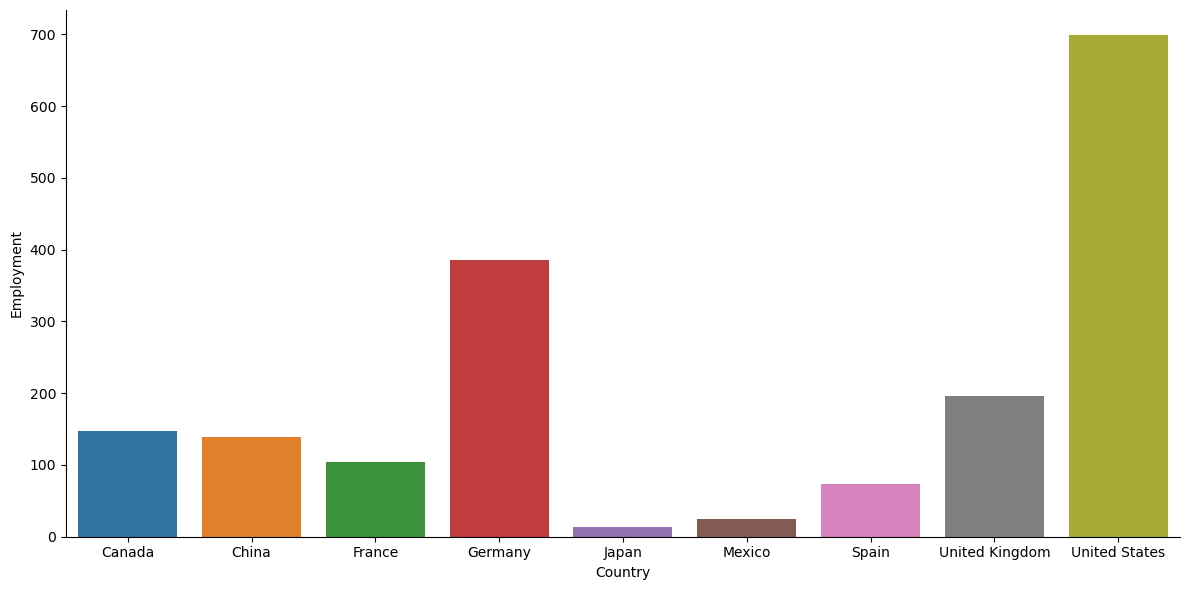

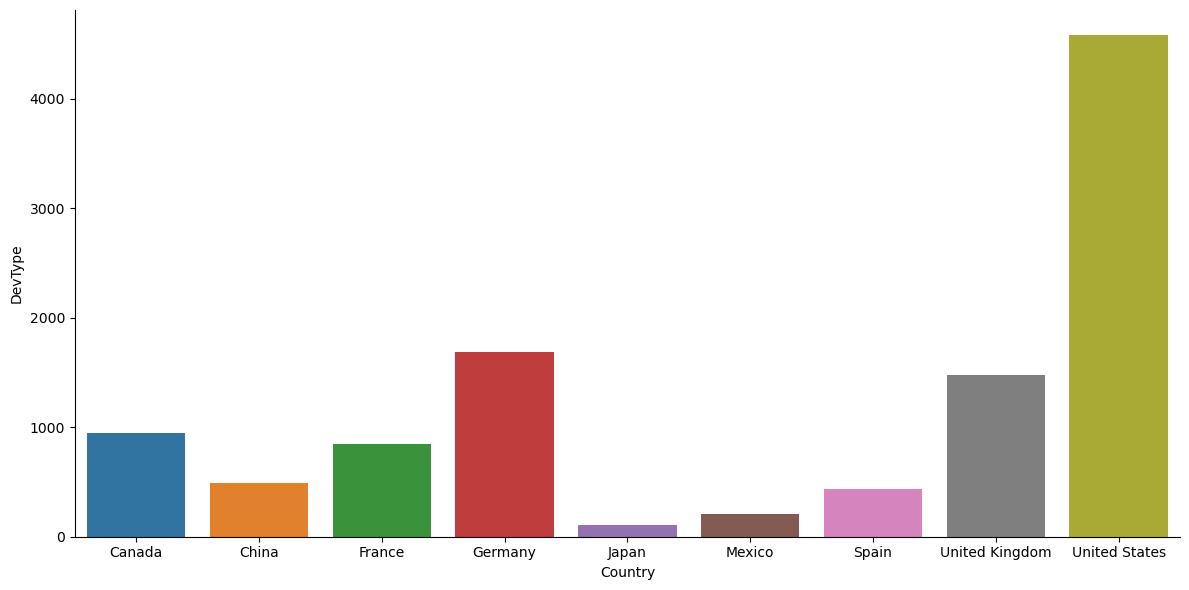

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df[['RespondentID','Country']].groupby('Country').count())

missingData = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()
print(missingData)
A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2)
B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2)
#Pairwise Deletion to only delete rows that have missing data for either Employment or DevType
df.dropna(subset = ['Employment','DevType'],
    inplace = True,
    how = 'any')

<p>Below is an analysis of the distribution of employment and developer types by country.
<ul>
<li>Front-end</li>
<li>Back-end</li>
<li>Full-stack</li>
<li>Mobile development</li>
<li>Administration roles</li>
</ul>
</p>
<p>The Result:<br>
You see that the vast majority of respondents are employed full-time given are Data source. Since these developers are mainly employed, this data will be relevant for a client who wants to see what developers look for in a potential job. Likely, companies or clients espcially within the US, prefer Full-time developers over all the lateral categories but would consider freelancer and contracts over part=time. This is possibly for unaffiliated or temp works hired when only necessary, however that's only speculation. You also see that the majority of developers will have skill sets in front-end, back-end, or full-stack development. This likely means the market values developers who can excel in at least a major part of the development lifecycle or more then one language, if not the entire stack. Mobile isn't a fan favorite though.</p>

c:\Users\TyQueece\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\TyQueece\AppData\Local\Temp\ipykernel_6992\1842049835.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev.loc[dev['DevType'].str.contains('back-end'), 'BackEnd'] = True
C:\Users\TyQueece\AppData\Local\Temp\ipykernel_6992\1842049835.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev.loc[dev['DevType'].str.contains('front-end'

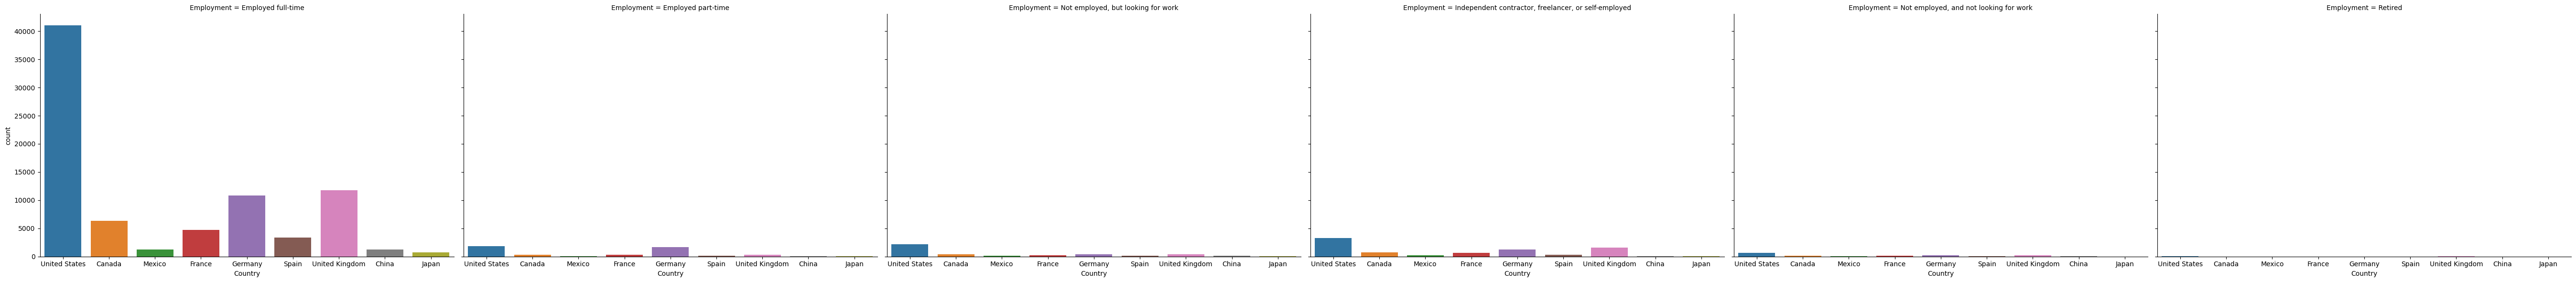

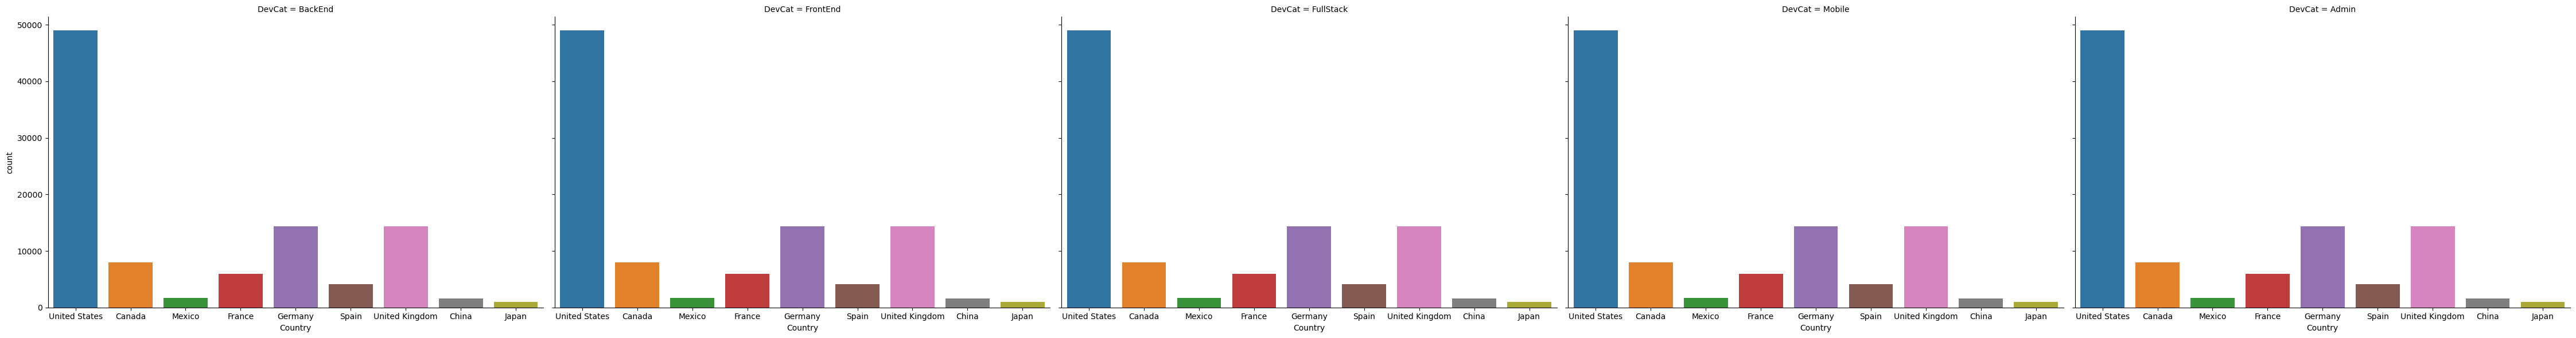

In [4]:
empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=6, aspect=1.5);

# Focus on a few of the key developer types outlined in the Stack Overflow survey
dev = df[['Country','DevType']]
dev.loc[dev['DevType'].str.contains('back-end'), 'BackEnd'] = True
dev.loc[dev['DevType'].str.contains('front-end'), 'FrontEnd'] = True
dev.loc[dev['DevType'].str.contains('full-stack'), 'FullStack'] = True
dev.loc[dev['DevType'].str.contains('mobile'), 'Mobile'] = True
dev.loc[dev['DevType'].str.contains('administrator'), 'Admin'] = True

devs = dev.melt(
    id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')

dev.dropna(how='any', inplace=True)

devFig = sns.catplot(x="Country", col="DevCat", 
                    data=devs, kind="count", height=6, aspect=1.5);


<h3>Investigate developer undergraduate majors</h3>
<p>Below is an analysis into the background for each developer type trends in their educational experience that ultimately led to a career with technology. In particular, the overall trend of majors year over year for respondents. As viewed prior, about 11% of the data for UndergradMajor is missing. Why would such data be amiss? Could something have happened over the course of these three years? Is the fact that data is missing accurate or inaccurate?</p>

   Year  UndergradMajor
0  2018            5559
1  2019            3831
2  2020               0


c:\Users\TyQueece\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


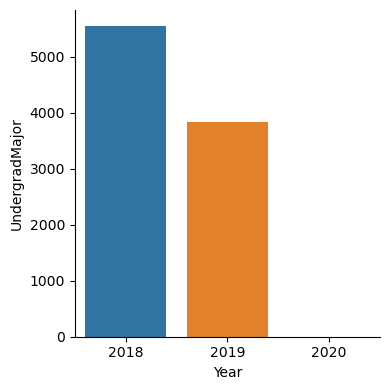

In [5]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()
print(missingUndergrad)

sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",
                height=4, aspect=1)

<p> &nbsp You'll see that all of the data for 2020 undergrad majors is filled in, indicating that each participant in these surveys had some level of decision for their undergrad major. Particularly, we are most interested in what major a person ultimately landed on, as this would be the educational background they would carry towards a job search. We'll carry that value backwards for each participant to fill in any missing data using Single Imputation : NOCB, a clever way to fill in lost data of sorts. 
<br><br>
&nbsp The following graph now shows a vast majority of people who enter the workforce for development have some background in a Computer Science major. Interestingly enough, however, the number of Computer Science majors significantly declined over the years surveyed, indicating that there could be other majors that have successfully entered the workforce for their desired job. This could mean both companies or clients found not just majors completely valid or reliable. This would require further analysis and could allow an individual to pursue a separate education path and still end up in some kind of developer role.
</p>

C:\Users\TyQueece\AppData\Local\Temp\ipykernel_6992\2221061556.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edud.dropna(how='any', inplace=True)
C:\Users\TyQueece\AppData\Local\Temp\ipykernel_6992\2221061556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edud.loc[edud['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
C:\Users\TyQueece\AppData\Local\Temp\ipykernel_6992\2221061556.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

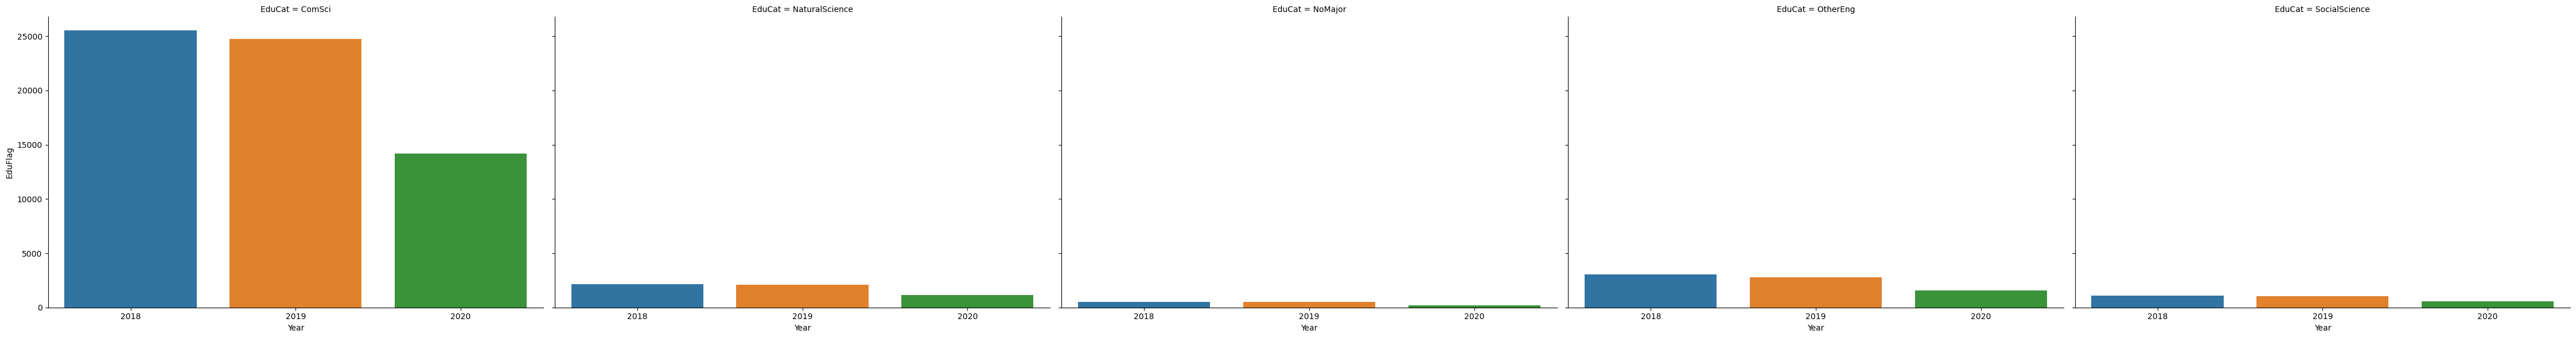

In [6]:
# Sort by ID and Year so that each person's data is carried backwards correctly
df = df.sort_values(['RespondentID','Year'])

df['UndergradMajor'].bfill(axis=0, inplace=True)

# Key major groups outlined in the Stack Overflow survey and analyze the major distribution for each year, using a vertical bar chart visualization
majors = ['social science','natural science','computer science','development','another engineering','never declared']
# Use Regex to locate by each row w/ loc
edud = df[['Year','UndergradMajor']]
edud.dropna(how='any', inplace=True)
edud.loc[edud['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edud.loc[edud['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edud.loc[edud['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edud.loc[edud['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edud.loc[edud['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edud.loc[edud['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

edud = edud.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')

edud.dropna(how='any', inplace=True)
edud = edud.groupby(['Year','EduCat']).count().reset_index()

eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edud, kind="bar",
                height=6, aspect=1.5);

<h3>Examine the relationship between years of experience and compensation</h3>

<p>Below, you'll see that although there are some outlier data points for each column, the overall distribution is fairly consistent year-over-year. This indicates that there is a strong correlation between the data points, which tells the common story about how experience can translate into compensation. To further investigate this tend, we'll fill missing data using Multiple Imputation</p>
<p>The following code after loops through (up to 20 times), and fill in the missing data based on the specified context provided by the other column. This should create data points that are indicative of the overall trend of the data. Thus now, we can analyze the relationship between YearsCodePro and ConvertedComp through the use of a boxplot.</p>

       YearsCodePro  ConvertedComp
0              10.0       141000.0
1               1.0        61000.0
2               4.0        48000.0
3               8.0        90000.0
4              13.0       116000.0
...             ...            ...
99970           9.0        93000.0
99971           9.0       116000.0
99972           9.0         8000.0
99973           9.0        71000.0
99974           1.0       144000.0

[99975 rows x 2 columns]


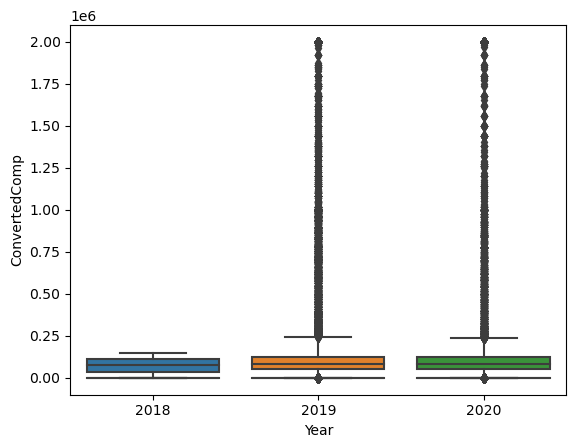

In [7]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

# Examine Overall Distribution w/ miss data
compFields = df[['Year','YearsCodePro','ConvertedComp']]

D = sns.boxplot(x="Year", y="YearsCodePro",
            data=compFields)

E = sns.boxplot(x="Year", y="ConvertedComp",
            data=compFields)


# Use Multiple Imputation, Cleaning data for further analysis
imputedf = df[['YearsCodePro','ConvertedComp']]

traindf, testdf = train_test_split(imputedf, train_size=0.1)

# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)

# Fit the model to the the test dataset
imp.fit(imputedf)

# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

print(compdf)

As such, the variation of years and experience is quite apparent within our trends. Based on data, we can simplify starting years around 3 below average minimum range of $40,000-
$110,000 a year while highest years of experience around 14+ average a minimum over $135,000+ a year.

C:\Users\TyQueece\AppData\Local\Temp\ipykernel_6992\764849428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


<Axes: xlabel='CodeYearBins', ylabel='ConvertedComp'>

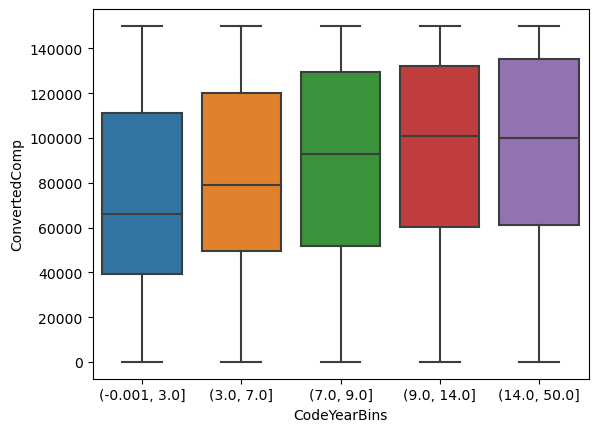

In [8]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)

sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)
